In [1]:
#read 3-column TF summit bed file. Return count, and  a dictionary, with chromosome as key, list of coordinates as value
def readbedfile(bedfilename): 
    with open(bedfilename,'r') as f:
        table=[]
        count=0
        for line in f:
            linetemp=line.split()
            chrom=linetemp[0]
            a1=linetemp[1]
            table.append([chrom, int(a1)]) 
            count+=1
    d={}
    for key, val in table:
        d.setdefault(key,[]).append(val)
    return count, d


In [3]:
#Enrichment score:  genomewide overlap of two transcription factor:  intersection devided by union

Dstn=200
def EnrichmentScore(bedfile1,bedfile2):
    count1,dict1=readbedfile(bedfile1)
    count2,dict2=readbedfile(bedfile2)
    intersectcount=0
    for chrom1 in dict1:
        if chrom1 not in list(dict2.keys()):
            continue
        for c1 in dict1[chrom1]:
            for c2 in dict2[chrom1]:
                if abs(c1-c2)<Dstn:
                    intersectcount +=1
                    break
    return (intersectcount)/(count1 + count2 -intersectcount)
EnrichmentScore('ChIP-Seq_for_Med12_in_mES_merged_withCtrl_p8_summits.bed','ESC_Klf4_ChIP_seq_macs_summits.bed')

(23823, 37911, 89486, 0.23000946183405102)

In [23]:
TFlist=['ESC_Klf4_ChIP_seq_macs_summits.bed','ESC_Oct4_ChIP_seq_macs_summits.bed',\
        'ESC_Sox2_ChIP_seq_macs_summits.bed','ESC_Esrrb_ChIP-seq_macs_summits.bed',\
       'ESC_Nanog_ChIP-seq_macs_summits.bed']
Scores1=[]
Names1=[]
def extractName(s):
    return s.split('_')[1]
for TF in TFlist:
    Scores1.append(EnrichmentScore('ChIP-Seq_for_Med12_in_mES_merged_withCtrl_p8_summits.bed',TF))
    Names1.append(extractName(TF))


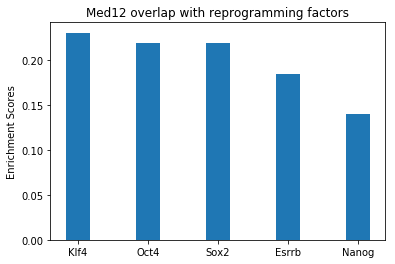

In [24]:
# plot enrichment score for every transcription factor:
import matplotlib.pyplot as plt
ind=range(5)
width = 0.35 
plt.bar(ind, Scores1, width)
plt.xticks(ind,Names1)
plt.ylabel('Enrichment Scores')
plt.title('Med12 overlap with reprogramming factors')
plt.show()

In [ ]:
# Do the same for enrichment score of p300
Scores=[]
Names=[]
for TF in TFlist:
    Scores.append(EnrichmentScore('ESC_p300_ChIP-Seq_macs_summits.bed',TF))
    Names.append(extractName(TF))

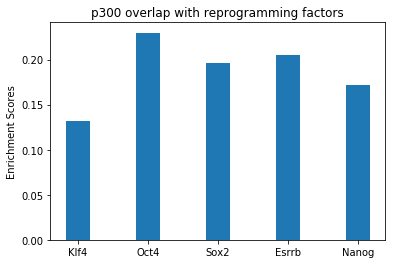

In [21]:
ind=range(5)
width = 0.35 
plt.bar(ind, Scores, width)
plt.xticks(ind,Names)
plt.ylabel('Enrichment Scores')
plt.title('p300 overlap with reprogramming factors')
plt.show()